In [2]:
pip install scikit-learn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Convert it to a pandas DataFrame for easier exploration
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map the target labels to the species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and target variable (y)
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


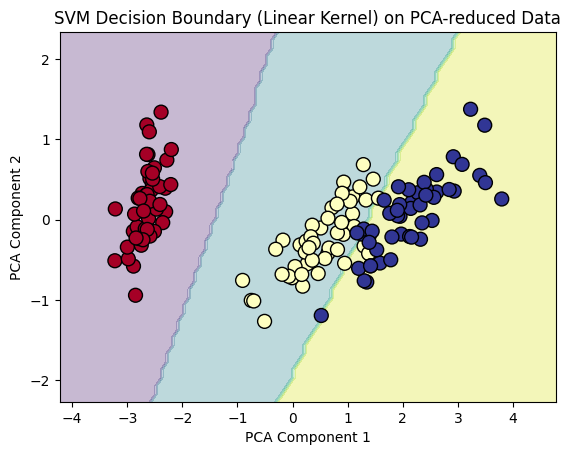

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to reduce the features to 2D (for visualization purposes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into train and test for PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the SVM model again (linear kernel for simplicity)
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model with the PCA-reduced data
svm_model.fit(X_train_pca, y_train_pca)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid to get the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu, s=100, marker='o')
plt.title("SVM Decision Boundary (Linear Kernel) on PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()